# Introduction to modeling: from concept to mathematics

*CSDMS Annual Meeting clinic, May 2022, Greg Tucker and CIF staff, CU Boulder*

## 1. From concept to ordinary differential equation (ODE) using mass balance: example of a lake basin

Imagine we have a lake or reservoir, and would like to understand better the factors that control how its water volume grows or shrinks over time. In particular, it we would like to have a mathematical model that predicts how the volume changes over time as a function of the various inputs and outputs. We can create such a model using a general and powerful technique called **mass balance analysis**.



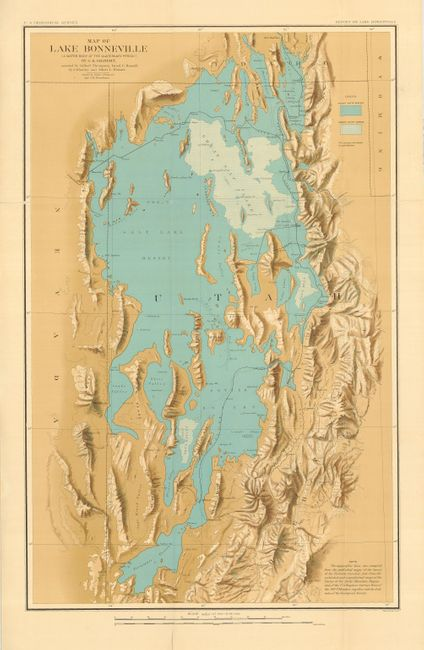

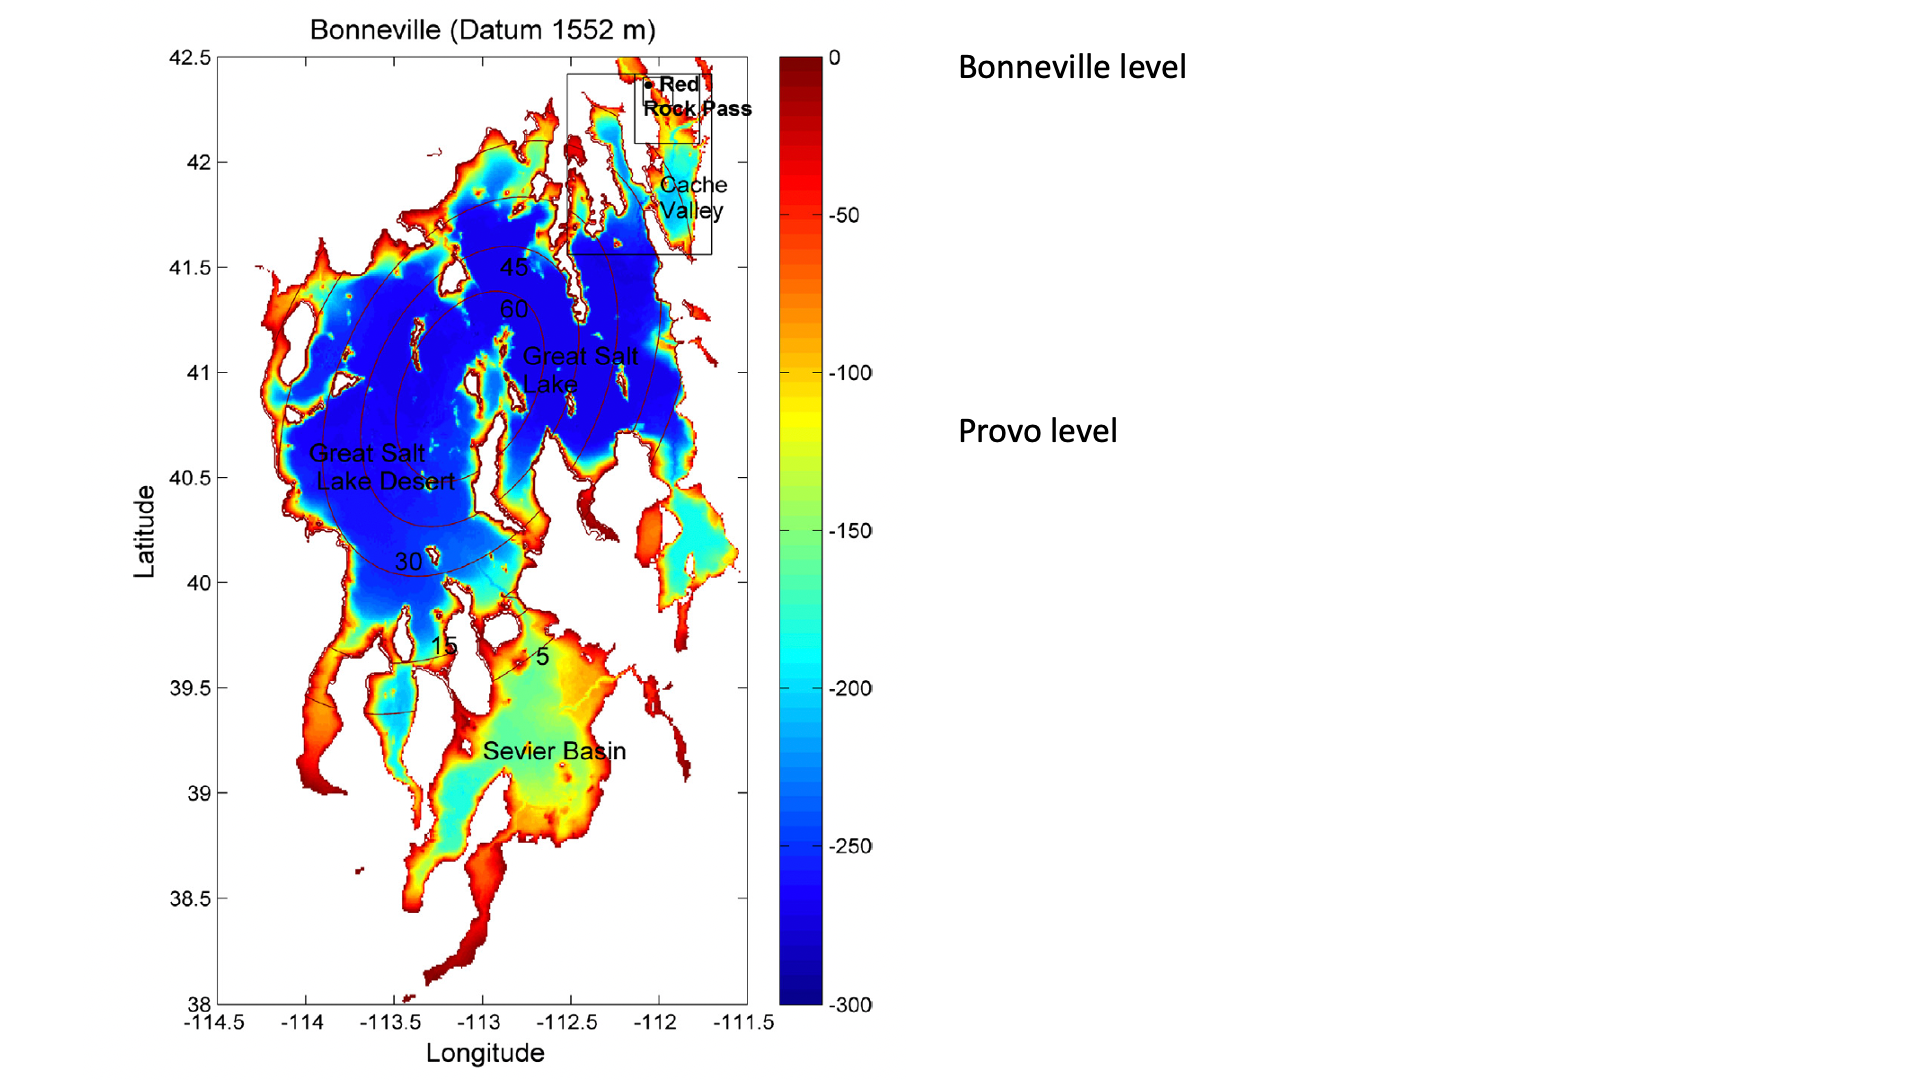


### 1.1 Defining a control volume

We start by defining the substance whose mass we want to track (say, water), and a *control volume:* a zone in space in which we want to keep track of mass. It could have a specific shape and size, such as water within an aquifer that has certain dimensions. Or it could be a conceptual "box", such as the organic carbon in the world's soils. Either way, our control volume defines the boundaries of our system, and our model's job will be to describe the ins and outs of mass across those boundaries.

In this example, our control volume will be a lake basin in the shape of an inverted pyramid:


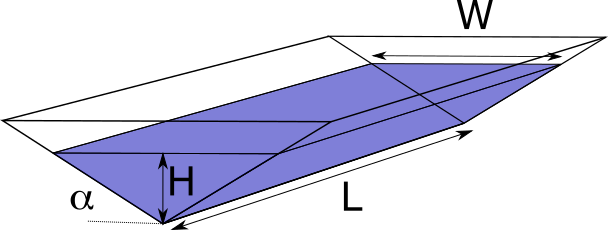


The height of water in the lake (above its deepest point) is $H$. The length and width of the lake are $L$ and $W$, respectively. The angle of the lake bed relative to the horizontal is $\alpha$. The volume of water in the lake at any given time is $V$.


### 1.2 General statement of mass balance

We start with a general statement of mass balance, first in words:

<h2 style="text-align: center;"><em>The time rate of change of mass in the control volume equals the rate of mass input, minus the rate of mass output, plus or minus any internal sources or sinks</em></h2>

Written in math:

$$
\begin{equation}
\Large
\frac{dm}{dt} = M_\text{in} - M_\text{out} + S
\end{equation}
$$

where:

$m$ is mass [M]

$t$ is time [T]

$M_\text{in}$ [M/T] is the rate of mass flowing into the control volume across its boundaries

$M_\text{out}$ [M/T] is the rate of mass flowing out of the control volume across its boundaries

$S$ [M/T] is the rate at which mass (of the substance of interest) is created or lost inside the volume

(Here the notation [M], [T], [L] is used to indicate quantities that have units of mass, time, or length, respectively).



### 1.3 List assumptions

For our lake model, we will (initially) assume:

- Density of water is constant ($\rho$)
- Water enters lake from a river with discharge (volume per time) $Q_\text{in}$
- Water leaves the lake via evaporation at rate $E$
- No internal sources or sinks (i.e., $S=0$)


### 1.4 Express the pieces in the general mass-balance equation in terms of quantities of interest

#### Mass of water in lake at any given time

$$\Large m = \rho V$$

#### Mass input and output rates

$$\Large M_\text{in} = \rho Q$$

$$\Large M_\text{out} = \rho E L W$$

$$\Large S=0$$


### 1.5 Plug them into the balance equation, and rearrange to get the quantity of interest on the left side of the equation

$$\Large \frac{d(\rho V)}{dt} = \rho Q - \rho E L W$$

Because $\rho$ is constant,

$$\Large \frac{dV}{dt} = Q - E L W$$

Width ($W$) and volume ($V$) are related by geometry:

$$\Large W = \sqrt{\frac{2V}{L\tan\alpha}}$$

So we have a **nonlinear ordinary differential equation (ODE)**:

$$\Large \boxed{\frac{dV}{dt} = Q - E \sqrt{\frac{2VL}{\tan\alpha}}}$$





### 1.6 Solve your model analytically

Sometimes we are lucky, and our mathematical model can be solved analytically. Often, we can at least solve it for special cases. 

Here for example, there's an obvious solution for what the lake looks like at steady state, inflow and evaporation are balanced and the time derivative is zero:

$$\Large V = \frac{\tan\alpha}{2L} \left( \frac{Q}{E} \right)^2$$

*EXERCISE: plotting steady state $V$*

*In the cell below, import NumPy and matplotlib.pyplot, and use them in a Python script to plot volume versus evaporation rate for a hypothetical lake that has $\tan\alpha = 0.01$, $L = 2,000$ m, $Q = 10^7$ cubic meters per year, and $E$ ranging from 1 to 6 meters per year.*

In [ ]:
# Enter your code here

<details>
<summary><b>(click to see solution)</b></summary>

```
import numpy as np
import matplotlib.pyplot as plt

tana = 0.01
L = 2000.0
Q = 1.0e7
E = np.linspace(1.0, 6.0, 101)

V = (tana / (2 * L)) * (Q / E)**2

plt.plot(E, V)
plt.xlabel('Annual evaporation rate (m/yr)', fontsize=14)
plt.ylabel('Steady lake volume (m3)', fontsize=14)
```

</details>

*ADVANCED EXERCISE: use the code to explore the influence of the other variables on steady lake volume.*

### 1.7 Solve your model numerically

#### Forward-Euler Finite-Difference Method

Often a mathematical model will have no (known or easy) analytical solution, so we need to calculate an approximate **numerical solution**. One of the most common numerical approaches is the **finite-difference** method, in which we replace derivatives with finite approximations.

Taylor's Theorem tells us that if the value of a continuous and differential function is known at a point $t$, then its value at an unknown point $t + \Delta t$ can be found as the sum of an infinite series:

$$\large f(t+\Delta t) = f(t) + \frac{df}{dt}\Delta t + \frac{1}{2} \frac{d^2f}{dt^2}\Delta t^2 + + \frac{1}{3!} \frac{d^3f}{dt^3}\Delta t^3 + ...$$

We can *approximate* $f(t+\Delta t)$ by truncating this. If we truncate it to "first order" (i.e., keep only the first derivative), then

$$\Large \frac{df}{dt} \approx \frac{f(t+\Delta t) - f(t)}{\Delta t}$$

This form of finite differencing is sometimes called the Forward Euler method, because it uses known information at step $t$ to project forward to $t+1$ (and in honor of the famous Swiss mathematician Leonhard Euler). We can therefore write a finite-difference version of our lake model that looks like this:

$$\Large \frac{V(t+\Delta t) - V(t)}{\Delta t} = Q - E \sqrt{\frac{2V(t)L}{\tan\alpha}}$$

Supposing we already know $V(t)$, we can re-write this to put the one thing we don't know, $V(t+\Delta t)$, on the left side by itself:

$$\Large V(t+\Delta t) = V(t) + \Delta t \left( Q - E \sqrt{\frac{2V(t)L}{\tan\alpha}}\right)$$

This equation reveals the possibility of iterative calculation. Suppose we know the *initial* value of $V$, at time $t=0$. We can use that to calculate $V(\Delta t)$. And then we can use *that* value to calculate $V(2\Delta t)$, and so on, for as many iterations as we like.

We'll call each such iteration a **time step**. The duration of each step is $\Delta t$. It's common practice to use superscript notation, $V^t$, to mean: $V$ evaluated at time step number $t$. Using this notation, our iterative equation is:

$$\Large \boxed{V^{t+1} = V^t + \Delta t \left( Q - E \sqrt{\frac{2V^tL}{\tan\alpha}}\right)}$$



#### Python code to implement this method

We can use a loop to calculate successive values of $V$, given the various parameters ($Q$, $E$, etc.) and a starting value for $V$. Try it here:

In [ ]:
# Type your code here

<details>
<summary><b>(click to see solution)</b></summary>

```
dt = 0.1  # time step duration, years
num_steps = 200  # number of iterations
V0 = 0.0  # initial volume, m3
evap_rate = 4.0  # evaporation rate, m/yr

V = np.zeros(num_steps + 1)
V[0] = V0

for i in range(num_steps):
    rate_of_change = Q - evap_rate * (2 * V[i] * L / tana)**0.5
    V[i+1] = V[i] + dt * rate_of_change

plt.plot(dt * np.arange(len(V)), V)
plt.xlabel('Time (yr)', fontsize=14)
plt.ylabel('Volume (m3)', fontsize=14)
```

</details>

*ADVANCED EXERCISES:*

- *Try adding lines to the above code to calculate and plot water depth over time (from the geometry of our prism-shaped basin, $H = \sqrt{V\tan\alpha / L}$)*
- *How long did it take the lake to reach 95% of its final equilibrium volume?*
- *Try running some experiments to see what parameters influence that time scale*
- *Try putting the above code inside a function that you can call*

#### About time

Why not save some time and make the time steps larger?

*EXERCISE: Try a version of the above code with a time step of 5 years instead of 0.1. What's going on?*

In [ ]:
# Enter your code here

<details>
<summary><b>(click to see solution)</b></summary>

```
dt = 5.0  # time step duration, years
num_steps = 4  # number of iterations
V0 = 0.0  # initial volume, m3
evap_rate = 4.0  # evaporation rate, m/yr

V = np.zeros(num_steps + 1)
V[0] = V0

for i in range(num_steps):
    rate_of_change = Q - evap_rate * (2 * V[i] * L / tana)**0.5
    V[i+1] = V[i] + dt * rate_of_change

plt.plot(dt * np.arange(len(V)), V)
plt.xlabel('Time (yr)', fontsize=14)
plt.ylabel('Volume (m3)', fontsize=14)
```
    
</details>

*ADVANCED EXERCISES:*

- *What determines the rate of change of volume during the first time step, when volume starts out at zero?*
- *What's the largest $\Delta t$ you could use that would *not* overshoot the final equilibrium?*

### 1.8 A slightly more complex model

Suppose your lake was a hydro-power reservoir with an open gate at the base of the dam (i.e., at depth $H$ below the water surface). Torricelli's law says that the speed of the water flowing out the gate would be $\sqrt{2gH}$. Imagine that the gate itself is $h$ meters high and $w$ meters wide. Now add a term to our governing equation to represent this outflow. What does the modified equation look like?

Replace the ellipsis (...) below with the new term for outflow:

$$\frac{dV}{dt} = Q - E \sqrt{\frac{2VL}{\tan\alpha}} - ...$$

<details>
    <summary><b>(Click here to see solution)</b></summary>

$$\frac{dV}{dt} = Q - E \sqrt{\frac{2VL}{\tan\alpha}} - wh(2g)^{1/2}(V\tan\alpha/L)^{1/4}$$

</details>

*Advanced exercises:*

- *Try modifying the above code to add this additional term*
- *Try modifying the equation so that the inflow discharge, $Q$, is calculated as (precipitation minus evapotranspiration) x basin area*
- *Try a version of the code in which $Q$ and/or $E$ vary seasonally (perhaps representing each with a sine wave; a Mediterranean climate would have hot, dry summers, and cool, wet winters, so $Q$ and $E$ would be out of phase)*

## 2. Mass balance for a spatially varying quantity: example of an evolving hillslope

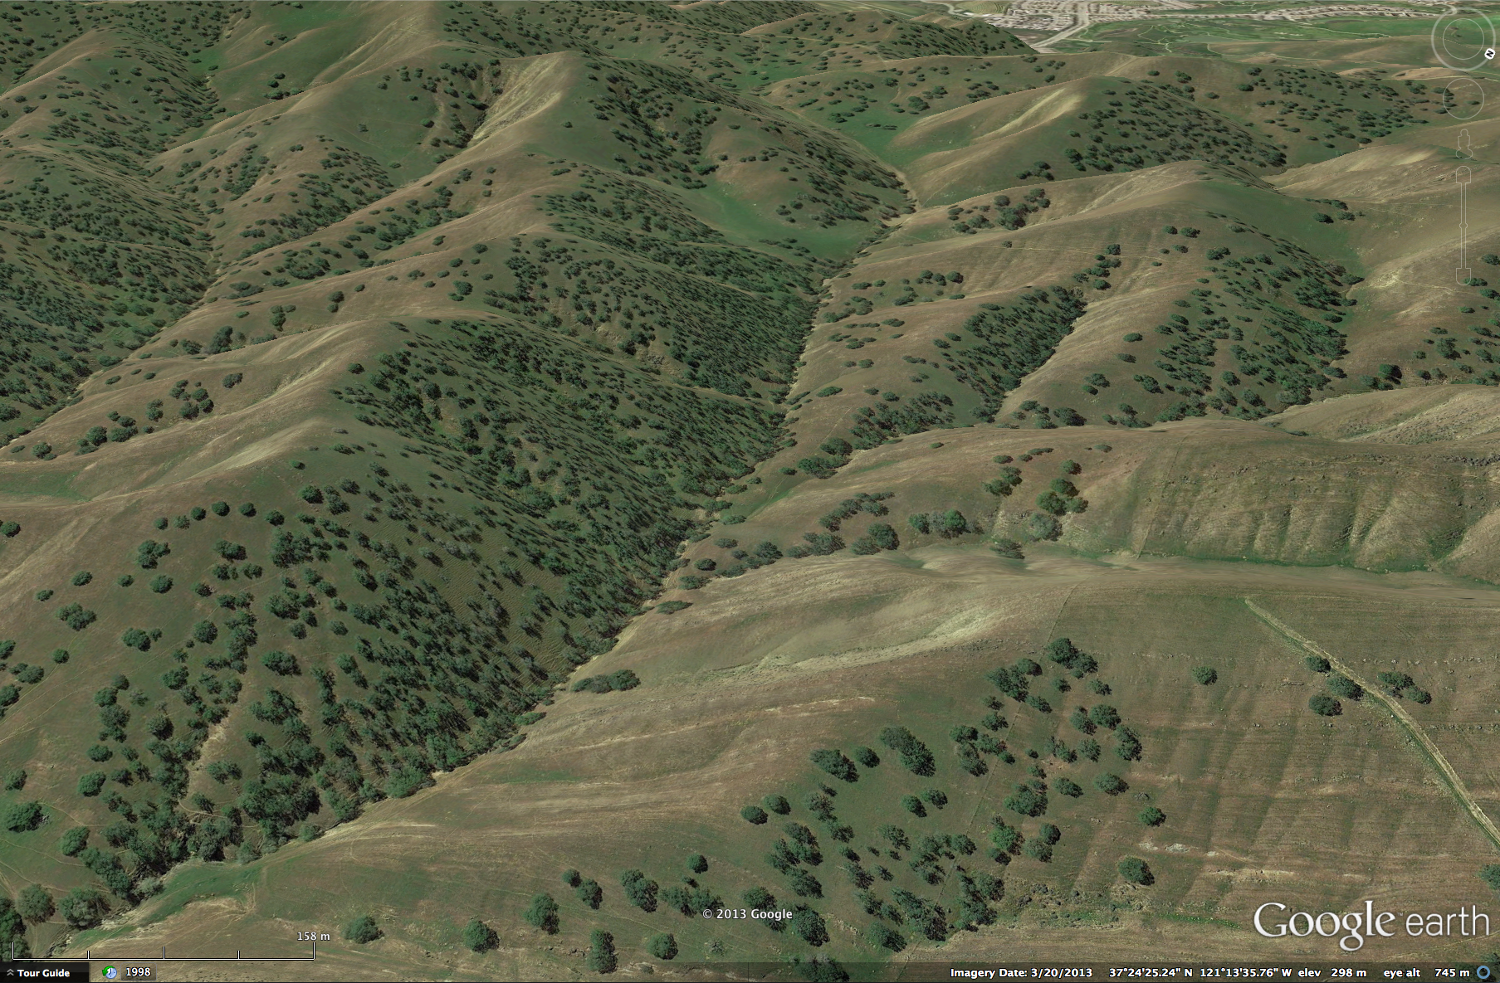

### 2.1 Scientific motivation

Soil-mantled hillslopes are shaped in part by **soil creep**: a gradual down-slope movement of soil, often due to intermittent disturbance events such as animal burrowing. All else equal, the transport rate is higher on steeper slopes. Can this process explain the convex-upward forms commonly seen in the field? Can it account for the gradual "smoothing" over time of features like fault scarps and shoreline terrace scarps? What does it imply about landform shapes, or about the speed of landform evolution?

To answer these questions, we would like to have a theory for how the height of the land, $z$, changes as a function of time, $t$, and position along a transect, $x$. In other words, we want a mathematical model for $z(x,t)$.


### 2.2 Control volume: a column of soil on a hillslope

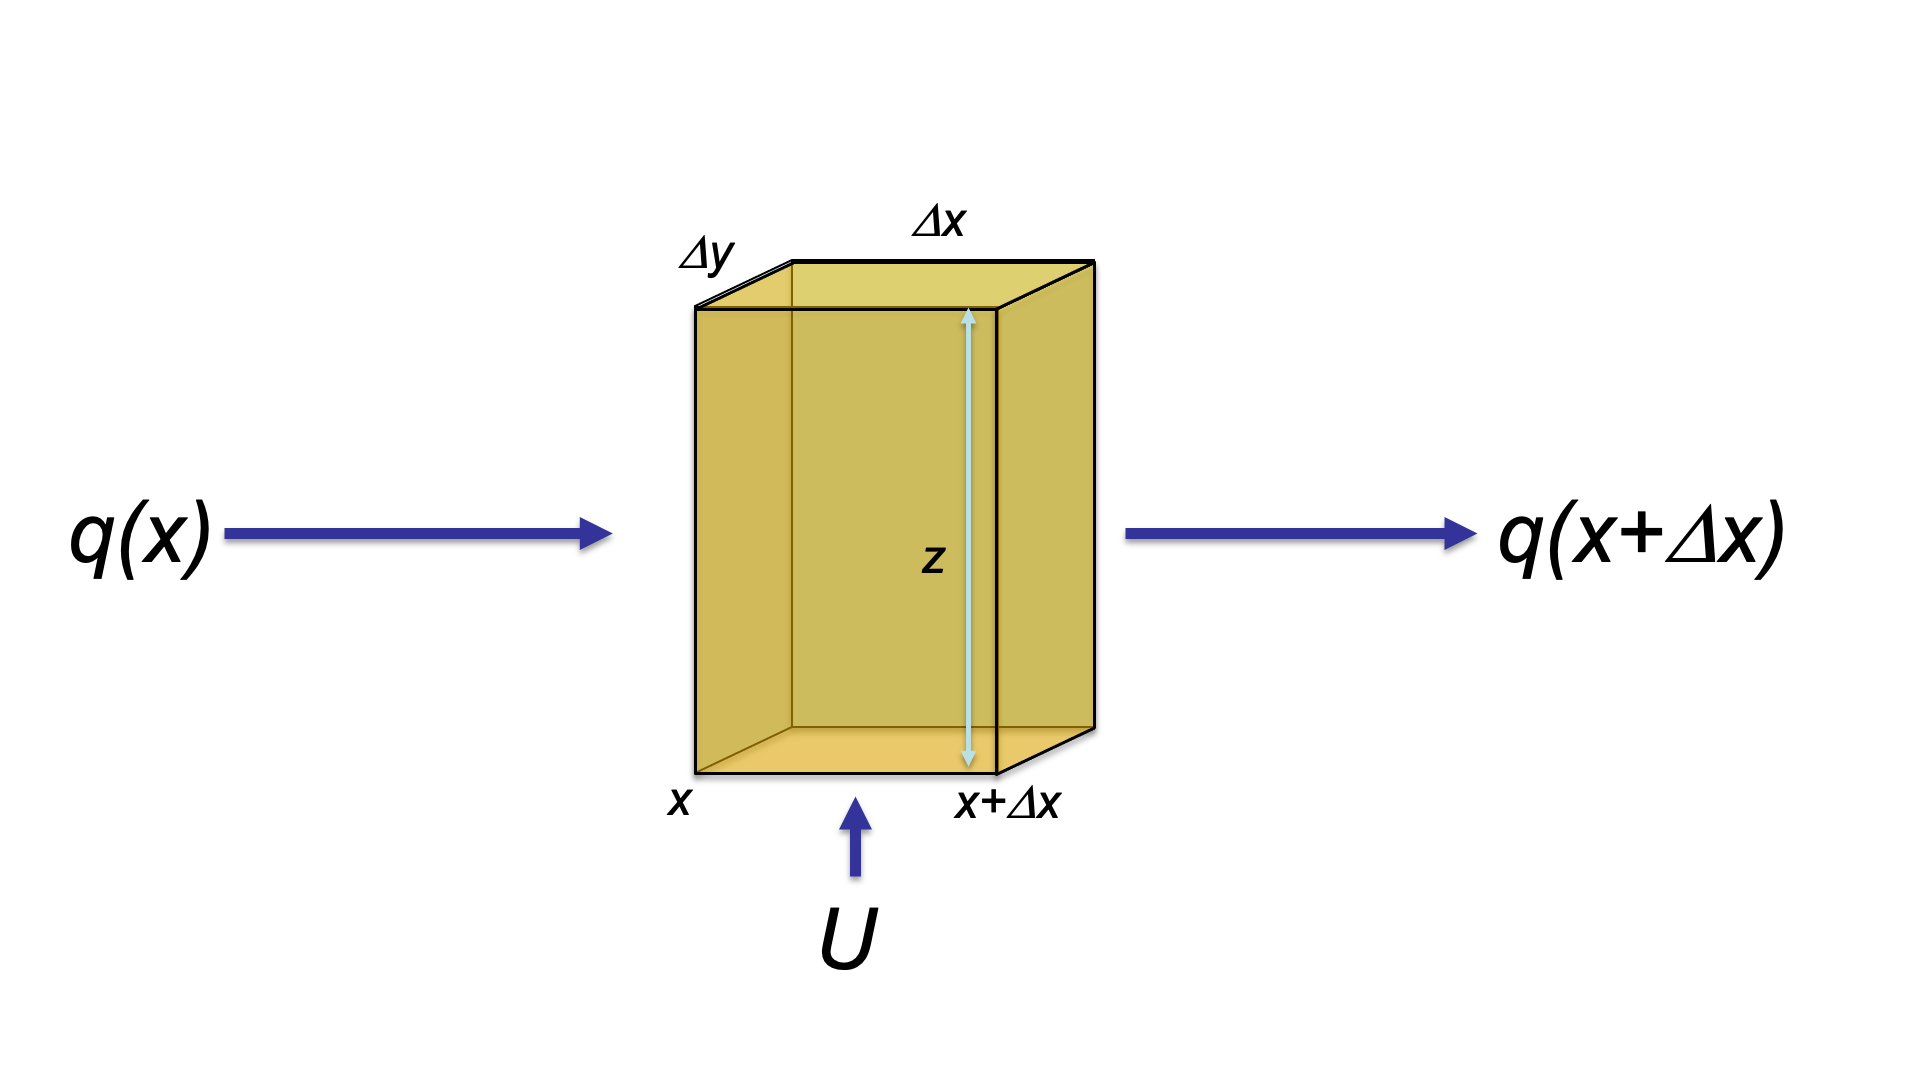

$q(x)$ is volumetric soil inflow rate per unit width into the left side of the box (dimensions of volume per time per width, or L$^2$/T)

$q(x+\Delta x)$ is the soil flow rate out the right side of the box

$U$ represents the rate at which soil (or rock) material is "uplifted" relative to a baselevel datum at the base of the hill (so the model is in the reference frame of the base of the hill) 

### 2.3 List assumptions

- soil flows only in the $x$ direction (1D)
- soil has a constant bulk density $\rho_s$
- there is always plenty of soil, and its thickness extends indefinitely deep
- there are no internal sources or sinks (e.g., no chemical weathering that removes mass), and no processes other than the along-slope transport represented by $q$ (e.g., no eolian input or loss)

### 2.4 Express the pieces in the general mass-balance equation in terms of quantities of interest

*EXERCISE: Take a moment to try writing down the key pieces in the mass balance:*

#### *Mass of soil in column at any given time*

$$m = ...?$$

#### *Mass input and output rates*

$$M_\text{in} = ...?$$

$$M_\text{out} = ...?$$


<details>
<summary><b>(click to see solutions)</b></summary>

$$m = \rho_s \Delta x \Delta y z$$
    
$$M_\text{in} = \rho_s U \Delta x \Delta y + \rho_s \Delta y q(x)$$
    
$$M_\text{out} = \rho_s \Delta y q(x+\Delta x)$$

</details>

### 2.5 Plug them into the balance equation, and rearrange to get the quantity of interest on the left side of the equation

(Note: now we use partial derivative notation, $\partial /\partial t$, because the variable $z$ depends on both $t$ and $x$)

$$
\begin{equation}
\frac{\partial m}{\partial t} = M_\text{in} - M_\text{out}
\end{equation}
$$

*EXERCISE: plug the individual pieces into the above mass-balance equation:*

$$
\begin{equation}
\rightarrow \frac{\partial (?)}{\partial t} = ? - ?
\end{equation}
$$

<details>
<summary><b>(click to see solution)</b></summary>

$$\frac{\partial (\rho_s \Delta x \Delta y z)}{\partial t} = \rho_s U \Delta x \Delta y + \rho_s q(x) - \rho_s q(x+\Delta x)$$

Pull out constants:
$$\rho_s \Delta x \Delta y \frac{\partial z}{\partial t} = \rho_s U \Delta x \Delta y + \rho_s q(x) - \rho_s q(x+\Delta x)$$
    
Simplify and rearrange:
$$\boxed{\frac{\partial z}{\partial t} = U  + \frac{q(x) - q(x+\Delta x)}{\Delta x}}$$

</details>



We can rearrange term containing $q$ so it takes the form of a slope (rise over run):

<details>
<summary><b>(click to see solution)</b></summary>

$$\boxed{\frac{\partial z}{\partial t} = U  - \frac{q(x+\Delta x) - q(x)}{\Delta x}}$$

</details>

Then, take the limit as $\Delta x \rightarrow 0$:

<details>
<summary><b>(click to see solution)</b></summary>

$$\boxed{\frac{\partial z}{\partial t} = U  - \frac{\partial q}{\partial x}}$$


</details>

That's our mass balance equation.

#### Adding a flow law for $q$

Field, lab, and theoretical studies have shown that for relatively gentle, soil-mantled slopes, a good approximation for $q$ is (in 1D):

$$q = -D\frac{\partial z}{\partial x}$$

Here $D$ is a transport-rate coefficient with dimensions of volume per time per width [L$^2$/T]. Field estimates 

*EXERCISE: try plugging this in for $q$ in the mass-balance PDE above, assuming $D$ is constant. What do you get?*


<details>
    <summary><b>(Click here for solution)</b></summary>
    
$$\frac{\partial z}{\partial t} = U  - \frac{\partial (-D\frac{\partial z}{\partial x})}{\partial x}$$

$$\rightarrow \frac{\partial z}{\partial t} = U  + D \frac{\partial (\frac{\partial z}{\partial x})}{\partial x}$$
  
$$\rightarrow \boxed{\frac{\partial z}{\partial t} = U  + D \frac{\partial^2 z}{\partial x^2}}$$
    
Hey, that's a 1D diffusion equation!

</details>

### 2.6 Solve your model analytically

#### Analytical solutions

Analytical solutions to the 1D diffusion equation are known for some special cases, including a step change or sinusoidal variation at one end of the domain. Here, let's look at the solution for a steady hillslope that has a balance between erosion and baselevel lowering ("uplift"). If we set $\partial z/\partial t = 0$ and integrate twice,

$$z = \frac{U}{2D} \left( L^2 - x^2 \right)$$

where $L$ is the length of our hillslope, and $x$ is the distance from the top of the slope (where $dz/dx=0$).

*ADVANCED EXERCISE: try deriving this.*

#### Calculating and plotting the analytical solution for equilibrium

*EXERCISE: write Python code using NumPy arrays and the pyplot function `plot()` to calculate and plot the steady state form of the hillslope, using $U=0.0001$ m/yr, $D=0.01$ m$^2$/yr, $L = 100$ m, and $x$ ranging from -100 to +100.*

In [ ]:
# (Enter your code here)


<details>
<summary><b>(Click here for solution)</b></summary>

```
U = 0.0001  # baselevel lowering ("uplift") rate, m/yr
D = 0.01  # creep coefficient, m2/yr
L = 100.0  # length of hillslope, m

x = np.arange(-L, L+1)  # array of x values

z = (U / (2 * D)) * (L*L - x*x)

plt.plot(x, z)
plt.xlabel('Distance (m)')
plt.ylabel('Height above slope base (m)')
```

</details>

### Solve your model numerically: FTCS Finite-Difference Method

Numerical solutions to the diffusion equation are well known. Here we will use one of the simplest of these: a finite-difference method called **Forward-Time, Centered-Space (FTCS)**.

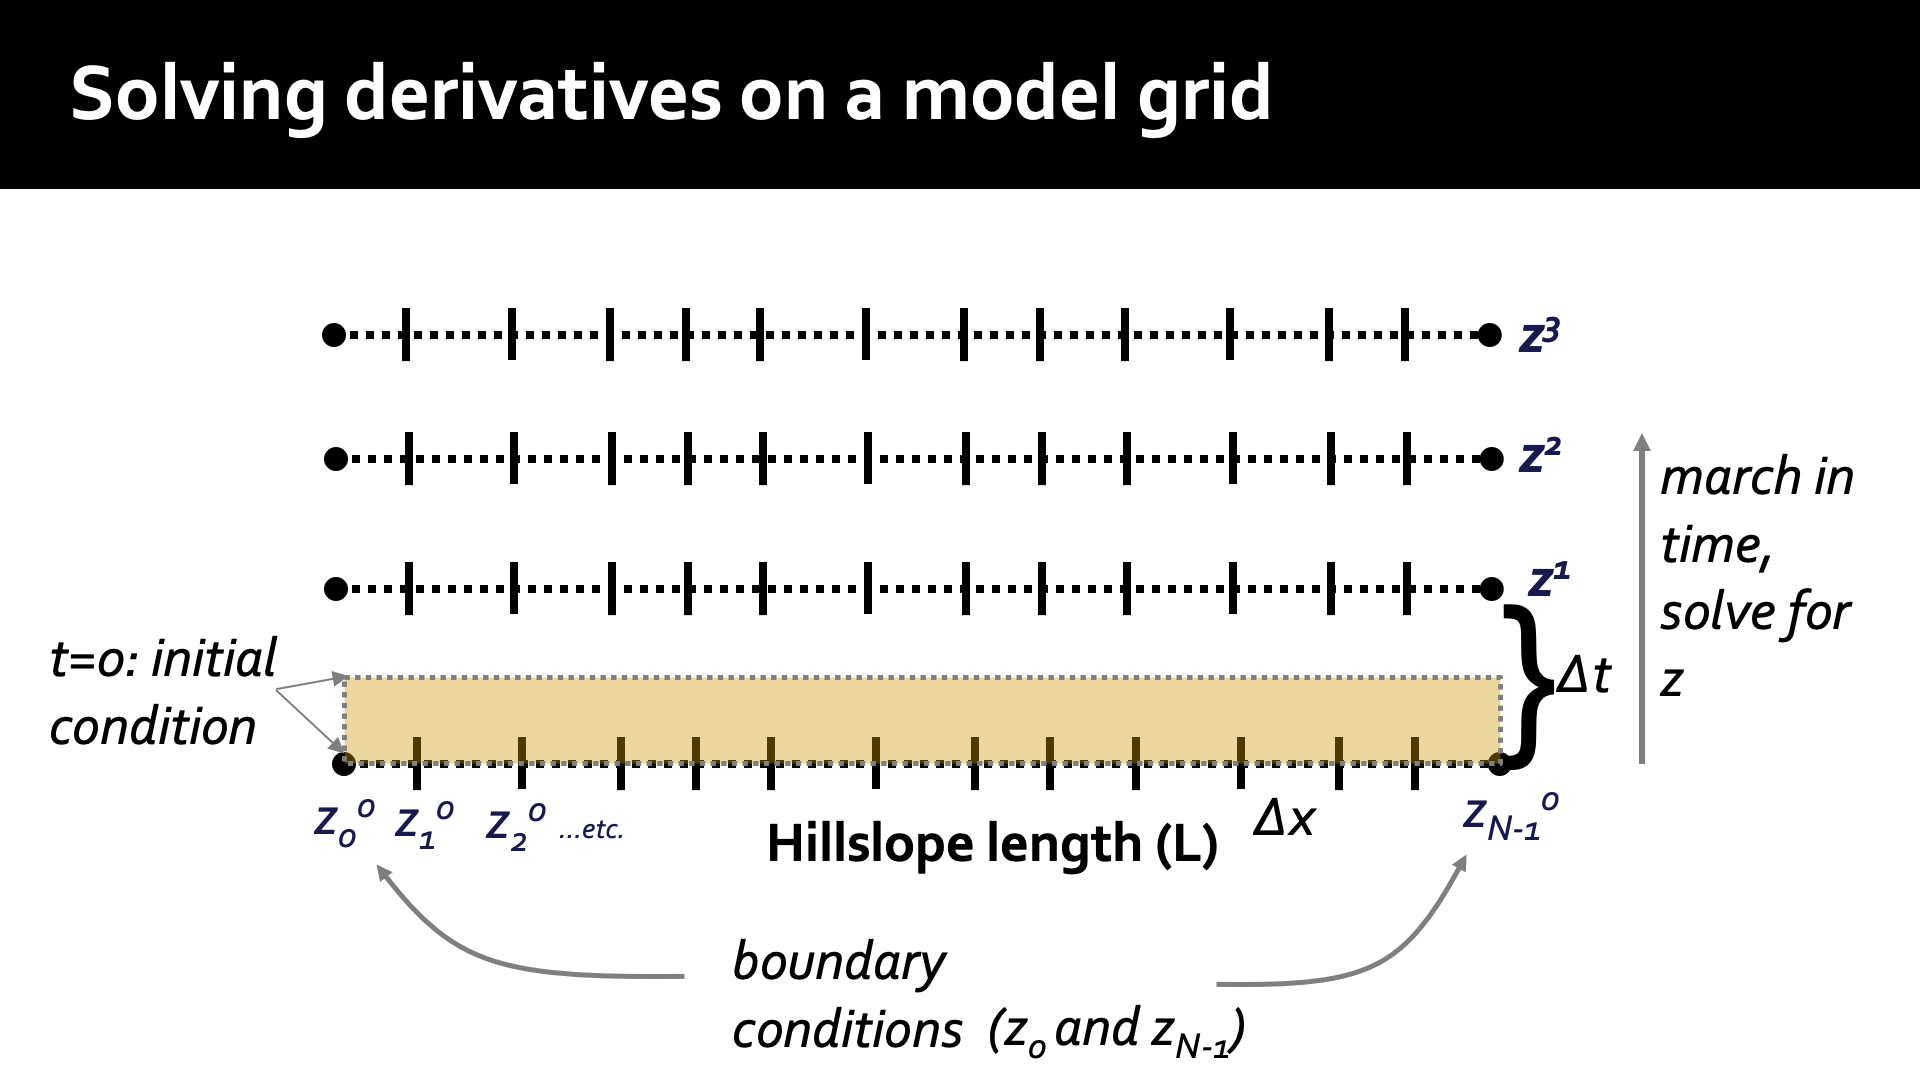

The time derivative is approximated with a discrete, first-order finite-difference just as in the lake example:

$$\frac{\partial z}{\partial t} \approx \frac{z_i^{t+1}-z_i^t}{\Delta t}$$

The second derivative, $\partial^2z/\partial x^2$, is slightly more complicated to difference. Here's one approach:

1. Calculate the soil flux at the **edge** between two cells, $i$ and $i+1$. We'll call this edge $i+1/2$, and the flux there is $q_{i+1/2}$.


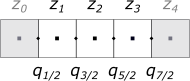

2. The flux at location $i+1/2$ depends on the gradient in $z$ at $i+1/2$:

$$q_{i+1/2} = -D \left| \frac{\partial z}{\partial x} \right|_{i+1/2}$$

3. Approximate the gradient as the difference in $z$ between the two bounding nodes, divided by the distance between them:

$$\left| \frac{\partial z}{\partial x} \right|_{i+1/2} \approx \frac{z_{i+1} - z_i}{\Delta x}$$

$$\rightarrow q_{i+1/2} = -D \frac{z_{i+1} - z_i}{\Delta x}$$

4. Approximate the gradient in $q$ at a node $i$ as the difference between $q$ on the adjacent edges, divided by distance:

$$\left| \frac{\partial q}{\partial x} \right|_i \approx \frac{q_{i+1/2} - q_{i-1/2}}{\Delta x}$$

5. Plug all of this back into the original equation. (EXERCISE: try this). Here's the result:

$$\frac{z_i^{t+1}-z_i^t}{\Delta t} = U + \frac{D}{\Delta x^2} \left(z_{i+1} - 2 z_i + z_{i-1}\right)$$

6. For the right-side, use the values at step $t$ (this makes it an *explicit* solution; if you used $t+1$, you would have an *implicit* method, which would require a matrix solution). Rearrange to put everything but the unknown $z_i^{t+1}$ on one side:

$$\boxed{z_i^{t+1} = z_i^t + U\Delta t + \frac{D\Delta t}{\Delta x^2} \left(z_{i+1}^t - 2 z_i^t + z_{i-1}^t\right)}$$

Some key points:

- This is known as the **explicit, forward-time, centered-space** method for the 1D diffusion equation.
- This equation allows an **iterative solution**: when you start with known intial values of $z$ at $t=0$, and set values for $z$ at the two boundaries, you can calculate new values of $z$ at the interior nodes after one time interval $\Delta t$. You can then calculate them for the next time interval, and the next after that, and so on.
- Time step size is limited! The factor $D\Delta t / \Delta x^2$ is known as the *diffusion number*, and it must be $\le 1/2$ (that's called the Courant-Friedrich-Lewy condition, or **CFL condition**).



*EXERCISE: Try writing a Python code to iteratively solve the above equation, using the same values for $U$ (0.0001 m/yr) and $D$ (0.01 m$^2$/yr) that we used for the equilbrium solution. Here are some tips:*

- *Make a NumPy array to hold values of $z$. Initially have just 5 nodes, as in the illustration above. Set the initial values to zero. Start off with $\Delta x = 50$ m.*

- *Write a `for` loop in which, at each iteration, you replace the current values of $z$ at nodes 1, 2, and 3 (i.e., the interior ones) with new ones calculated using the equation above (hint: you can save yourself an inner loop by using array slicing).*

In [ ]:
# (Enter your code here)


<details>
    <summary><b>(Click here for solution)</b></summary>

```
    import numpy as np
import matplotlib.pyplot as plt

U = 0.0001  # rate of baselevel lowering ("uplift"), m/yr
D = 0.01  # creep coefficient, m2/yr
dx = 50.0  # node spacing, m
dt = 0.5 * dx * dx / D  # CFL maximum time-step, yr
num_steps = 16  # number of time steps to compute

z = np.zeros(5)
diff_num = D * dt / (dx * dx)

for i in range(num_steps):
    z[1:-1] += U * dt + diff_num * (z[2:] - 2 * z[1:-1] + z[:-2])

x = np.linspace(-100, 100.0, 5)
plt.plot(x, z, '.-')
plt.xlabel('Distance (m)', fontsize=14)
plt.ylabel('Height above base of hill (m)', fontsize=14)
```
</details>

*EXERCISES:*

- *Run your model for different time periods, starting from just one time step, then 2, then 4, etc. Does the hill keep growing, or does it approach a steady state?*
- *If it does reach a steady state, how does the numerical solution compare with the equilibrium analytical solution? In particular, does the height of the hill match the predicted equilibrium of $UL^2/2D$?*
- *Experiment with your code, changing $U$, $D$, $dx$, and the length of your hillslope.*
- *Try setting your time step to a value that's larger than the CFL limit. What happens?*
- *In setting up the math behind the numerical solution, we saw that you can calculate $q$ at the cell edges. Would it be possible to write a code that explicitly calculates $q$ at the cell edges, then differences it to calculate the rate of change of $z$ at the nodes? (Hint: yes, this is perfectly possible, and in some ways more intuitive, but how would you program it?)*
- *Related: could you use the above approach to allow $D$ to vary in space?*

*ADVANCED EXERCISE: Use the steps in this section to derive an equation for heat conduction in a solid. Here, you need to use a thermal energy balance instead of a mass balance, but the general concept is the same. And instead of the soil creep law, you would use Fourier's law of heat conduction: but both of these express a flux (of soil or heat, respectively) in terms of a gradient (in height or temperature, respectively).*

## 3. Concluding notes

- Most geoscience-oriented mathematical models start with **conservation laws** for mass, energy, and/or momentum.
- Applying a conservation law to a system of interest starts with conceptualizing the system and identifying a **control volume**.
- Applying a conservation law with a control volume leads to a mathematical model that often takes the form of a **differential equation**.
- Depending on the nature of your equation, there may be an **analytical solution**, at least for certain special cases (such as equilibrium between inputs and outputs).
- Usually a complete solution for general cases requires approximation, using a **numerical method**.
- Many numerical methods have been developed for different types of equation. Among these **explicit finite differencing** is the most basic, and usually the easiest to program, but it often requires very small time-steps (and may therefore be costly to run, depending on your system). Other methods include *implicit finite difference*, *finite volume*, and *finite element*.
- The examples we have looked at here are **initial-value** problems in which the solution evolves over time from an initial state. There are also many examples in geoscience of **boundary-value** problems, which have their own sets of numerical methods.

The next clinic in this series will look at the Landlab Toolkit, and how it can be used to program 2D grid-based numerical solutions using finite-difference or finite-volume methods.

.